In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

## Load Dataset

In [2]:
df = pd.read_excel("TrainDataset2024.xls")

In [3]:
df.head()

,ID,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1,144.0,41.0,0,0,0,1,3,3,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,TRG002178,0,142.0,39.0,1,1,0,0,3,3,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,TRG002204,1,135.0,31.0,0,0,0,1,2,1,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,TRG002206,0,12.0,35.0,0,0,0,1,3,3,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,TRG002210,0,109.0,61.0,1,0,0,0,2,1,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [4]:
df.describe()

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,...,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000
mean,12.697500,56.000208,51.804674,0.547500,2.902500,2.797500,2.830000,9.875000,6.562500,8.63250,...,3.957637e-01,3.911005e-01,2.722189e+00,0.003347,5.679717e+07,178.311246,32500.032620,0.056935,0.005965,0.029322
std,111.107417,27.137584,10.948522,0.498362,49.932114,49.937068,49.935558,86.092911,70.444284,86.20034,...,1.666319e-01,1.615922e-01,7.648849e-01,0.002419,7.063846e+08,1045.453432,177545.921568,0.047179,0.008379,0.115915
min,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,...,7.050000e-11,7.050000e-11,-3.200000e-16,0.000008,0.000000e+00,0.000000,0.000248,0.000000,0.000000,0.000000
25%,0.000000,38.000000,44.516769,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,...,3.199017e-01,3.184398e-01,2.340783e+00,0.001389,1.030473e+06,18.760570,0.001826,0.018628,0.000310,0.001464
50%,0.000000,55.000000,51.019507,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,...,4.095627e-01,4.054695e-01,2.814884e+00,0.002944,3.277334e+06,67.929659,0.004383,0.047740,0.002330,0.003276
75%,0.000000,73.000000,60.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.00000,...,5.000049e-01,4.956920e-01,3.304411e+00,0.004798,9.079686e+06,157.370294,0.013769,0.085321,0.007962,0.009479
max,999.000000,144.000000,79.603012,1.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,...,8.773779e-01,8.571429e-01,4.947427e+00,0.011301,1.390001e+10,20764.693790,1000000.000000,0.285100,0.060742,1.145601


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 121 entries, ID to original_ngtdm_Strength
dtypes: float64(108), int64(12), object(1)
memory usage: 378.2+ KB


In [6]:
df.drop("ID", axis=1, inplace=True)
df.head()

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1,144.0,41.0,0,0,0,1,3,3,1,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,0,142.0,39.0,1,1,0,0,3,3,1,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,1,135.0,31.0,0,0,0,1,2,1,1,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,0,12.0,35.0,0,0,0,1,3,3,1,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,0,109.0,61.0,1,0,0,0,2,1,1,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


## Data Imputation

In [7]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

df.replace(999, np.nan, inplace=True)

df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [8]:
df.describe()

,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.210000,56.000208,51.804674,0.547500,0.405000,0.300000,0.332500,2.397500,1.572500,1.147500,...,3.957637e-01,3.911005e-01,2.722189e+00,0.003347,5.679717e+07,178.311246,32500.032620,0.056935,0.005965,0.029322
std,0.407818,27.137584,10.948522,0.498362,0.491507,0.458831,0.471699,0.500119,0.765643,0.355048,...,1.666319e-01,1.615922e-01,7.648849e-01,0.002419,7.063846e+08,1045.453432,177545.921568,0.047179,0.008379,0.115915
min,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,7.050000e-11,7.050000e-11,-3.200000e-16,0.000008,0.000000e+00,0.000000,0.000248,0.000000,0.000000,0.000000
25%,0.000000,38.000000,44.516769,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,3.199017e-01,3.184398e-01,2.340783e+00,0.001389,1.030473e+06,18.760570,0.001826,0.018628,0.000310,0.001464
50%,0.000000,55.000000,51.019507,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,...,4.095627e-01,4.054695e-01,2.814884e+00,0.002944,3.277334e+06,67.929659,0.004383,0.047740,0.002330,0.003276
75%,0.000000,73.000000,60.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,...,5.000049e-01,4.956920e-01,3.304411e+00,0.004798,9.079686e+06,157.370294,0.013769,0.085321,0.007962,0.009479
max,1.000000,144.000000,79.603012,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,...,8.773779e-01,8.571429e-01,4.947427e+00,0.011301,1.390001e+10,20764.693790,1000000.000000,0.285100,0.060742,1.145601


pCR (outcome)
0.0    316
1.0     84
Name: count, dtype: int64


<Axes: xlabel='pCR (outcome)', ylabel='count'>

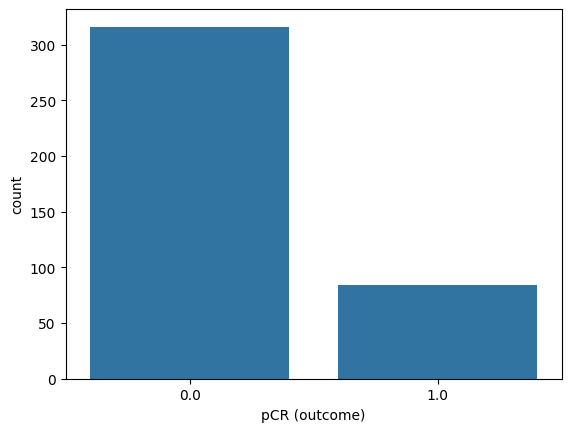

In [9]:
import seaborn as sns

print(df['pCR (outcome)'].value_counts())
sns.countplot(x="pCR (outcome)", data=df)

## Splitting X and Y Dataframes

In [10]:
y_class = df["pCR (outcome)"]
y_reg = df["RelapseFreeSurvival (outcome)"]
df.drop("pCR (outcome)", axis=1, inplace=True)
df.drop("RelapseFreeSurvival (outcome)", axis=1, inplace=True)

In [11]:
df.head()

,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,41.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,2.0,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,39.0,1.0,1.0,0.0,0.0,3.0,3.0,1.0,1.0,2.0,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,31.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,2.0,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,35.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,3.0,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,61.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,2.0,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [12]:
X_clinical = df.iloc[:, :11]
X_mri = df.iloc[:, 11:]

## Recursive Feature Elimination (RFE) on Clinical Features

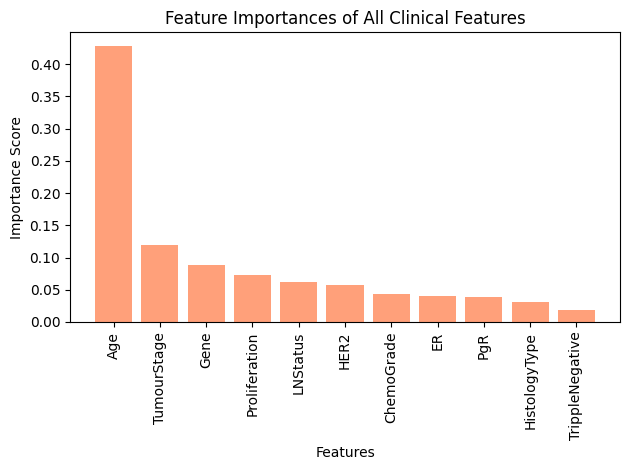

In [13]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

model_all = RandomForestClassifier(random_state=42)
model_all.fit(X_clinical, y_class)

all_importances = model_all.feature_importances_
indices = np.argsort(all_importances)[::-1]

plt.figure()
plt.title("Feature Importances of All Clinical Features")
plt.bar(X_clinical.columns[indices], all_importances[indices], color="lightsalmon", align="center")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

In [14]:
model = RandomForestClassifier(random_state=42)

rfecv = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_clinical, y_class)

selected_features = X_clinical.columns[rfecv.support_]
print("Optimal Number of Features:", rfecv.n_features_)
print("Selected Features:")
print(selected_features)

Optimal Number of Features: 9
Selected Features:
Index(['Age', 'ER', 'PgR', 'HER2', 'ChemoGrade', 'Proliferation', 'LNStatus',
       'TumourStage', 'Gene'],
      dtype='object')


In [15]:
X_clinical_fs = X_clinical[selected_features]

## Dimensionality Reduction on MRI Features

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_mri_dr = pca.fit_transform(X_mri)

print("Number of Components Selected:", pca.n_components_)

Number of Components Selected: 2


In [17]:
print(X_clinical_fs.shape, type(X_clinical_fs))
print(X_mri_dr.shape, type(X_mri_dr))

(400, 9) <class 'pandas.core.frame.DataFrame'>
(400, 2) <class 'numpy.ndarray'>


In [18]:
X = np.hstack((X_clinical_fs.values, X_mri_dr))

In [19]:
X.shape, type(X.shape)

((400, 11), tuple)

In [20]:
print(y_class.value_counts())
#sns.countplot(x="pCR (outcome)", data=df)

pCR (outcome)
0.0    316
1.0     84
Name: count, dtype: int64


## Z-score Distribution

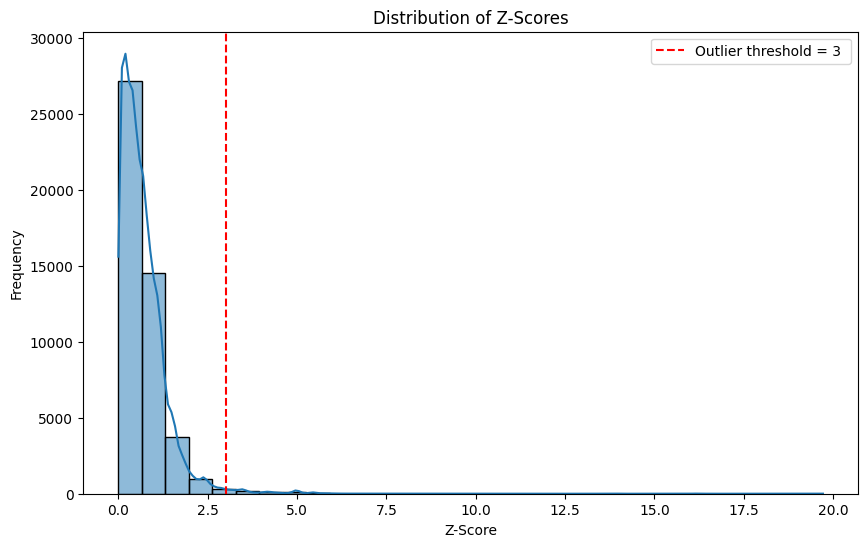

In [21]:
from scipy.stats import zscore

z_scores = np.abs(zscore(df))
z_scores = z_scores.to_numpy()
z_scores_flat = z_scores.flatten()

plt.figure(figsize=(10, 6))
sns.histplot(z_scores_flat, bins=30, kde=True)
plt.title("Distribution of Z-Scores")
plt.xlabel("Z-Score")
plt.ylabel("Frequency")
plt.axvline(x=3, color='r', linestyle='--', label="Outlier threshold = 3 ")
plt.legend()
plt.show()

## Data Splitting

In [22]:
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.30, random_state=42, stratify=y_class)

## LIGHTGBM WITHOUT SMOTE

In [34]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline


import lightgbm as gbm

lightgbm = gbm.LGBMClassifier()
lightgbm.fit(X_train, y_train)

y_pred_gbm = lightgbm.predict(X_test)

print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_gbm))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 59, number of negative: 221
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 296
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210714 -> initscore=-1.320625
[LightGBM] [Info] Start training from score -1.320625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


# MLP WITHOUT SMOTE


In [35]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation="relu", solver="adam", max_iter=2000, random_state=1)

param_grid = {
    'hidden_layer_sizes': [(100, 50, 25), (128, 64, 32, 16), (100, 80, 40, 20), (64, 32, 16, 8), (50, 50, 50, 50), (100, 50), (150, 100), (50, 30), (100, 100, 100, 50), (100, 100, 50), (100, 100, 80, 50), (128, 64, 32), (256, 128, 64), (300, 200, 150, 100), (200, 150, 100, 50)],
    'learning_rate_init': [0.1, 0.001, 0.0001, 0.00001],
}

# Perform GridSearchCV
grid_search_mlp = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

print("Performing GridSearchCV...")
grid_search_mlp.fit(X_train, y_train)


Performing GridSearchCV...


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=2000, random_state=1),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(100, 50, 25),
                                                (128, 64, 32, 16),
                                                (100, 80, 40, 20),
                                                (64, 32, 16, 8),
                                                (50, 50, 50, 50), (100, 50),
                                                (150, 100), (50, 30),
                                                (100, 100, 100, 50),
                                                (100, 100, 50),
                                                (100, 100, 80, 50),
                                                (128, 64, 32), (256, 128, 64),
                                                (300, 200, 150, 100),
                                                (200, 150, 100, 50)],
                         'learning_rate_init': [0.1, 0.001, 0.0001, 1e-05]},
             scoring='accuracy')

In [36]:
# Retrieve the best model and parameters
best_model_mlp = grid_search_mlp.best_estimator_
print("Best Parameters:", grid_search_mlp.best_params_)

# Make predictions on the test set
y_pred_mlp = best_model_mlp.predict(X_test)
y_pred_proba_mlp = best_model_mlp.predict_proba(X_test)[:, 1]

print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))

Best Parameters: {'hidden_layer_sizes': (100, 50, 25), 'learning_rate_init': 0.1}
MLP Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      1.00      0.88        95
         1.0       0.00      0.00      0.00        25

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))




---

